In [1]:
!pip install scikit-learn


In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier




In [4]:
def load_dataset(csv_file):
    return pd.read_csv(csv_file)

# Load the dataset using the load_dataset function
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = load_dataset(csv_file_path)

# Display the first few rows of the dataset as if viewing an Excel sheet
print("First 20 rows of the dataset:")
display(dataset.head(20))

# Print information about the dataset
print("\nInformation about the dataset:")
display(dataset.info())

# Print statistical summary of the dataset
print("\nStatistical summary of the dataset:")
display(dataset.describe())



First 20 rows of the dataset:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


None


Statistical summary of the dataset:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
## Data Cleaning 

In [6]:
def clean_dataset(dataset):
    # Remove duplicate rows
    dataset.drop_duplicates(inplace=True)
    
    # Remove rows with missing values
    dataset.dropna(inplace=True)
    
    return dataset
    

# Load the dataset using the load_dataset function
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = load_dataset(csv_file_path)

# Clean the dataset using the clean_dataset function
cleaned_dataset = clean_dataset(dataset)

# Display the first few rows of the cleaned dataset as if viewing an Excel sheet
print("First few rows of the cleaned dataset:")
display(cleaned_dataset.head())

# Print information about the cleaned dataset
print("\nInformation about the cleaned dataset:")
display(cleaned_dataset.info())


First few rows of the cleaned dataset:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1



Information about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


None

In [7]:
## Data Exploration & Visualization

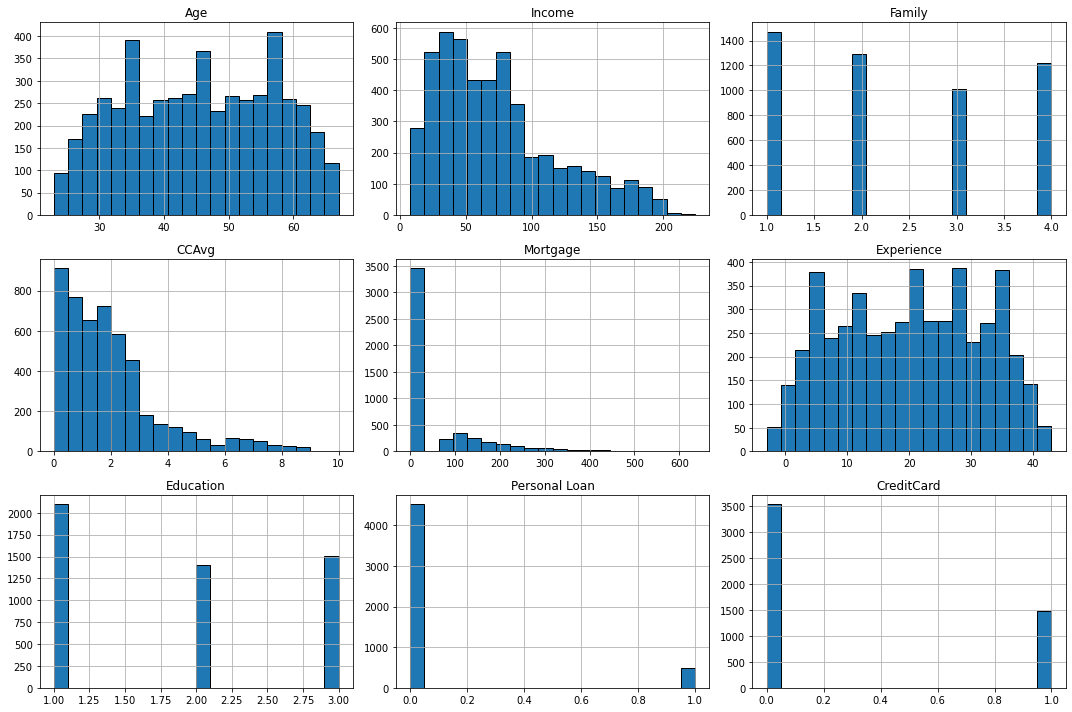

In [8]:
def print_histograms(dataset, histogram_columns):
    dataset[histogram_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
    plt.tight_layout()
    plt.show()

# Specify the column names for creating histograms
histogram_columns = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage','Experience', 'Education', 'Personal Loan', 'CreditCard']

# Print the histograms using the print_histograms function
print_histograms(cleaned_dataset, histogram_columns)


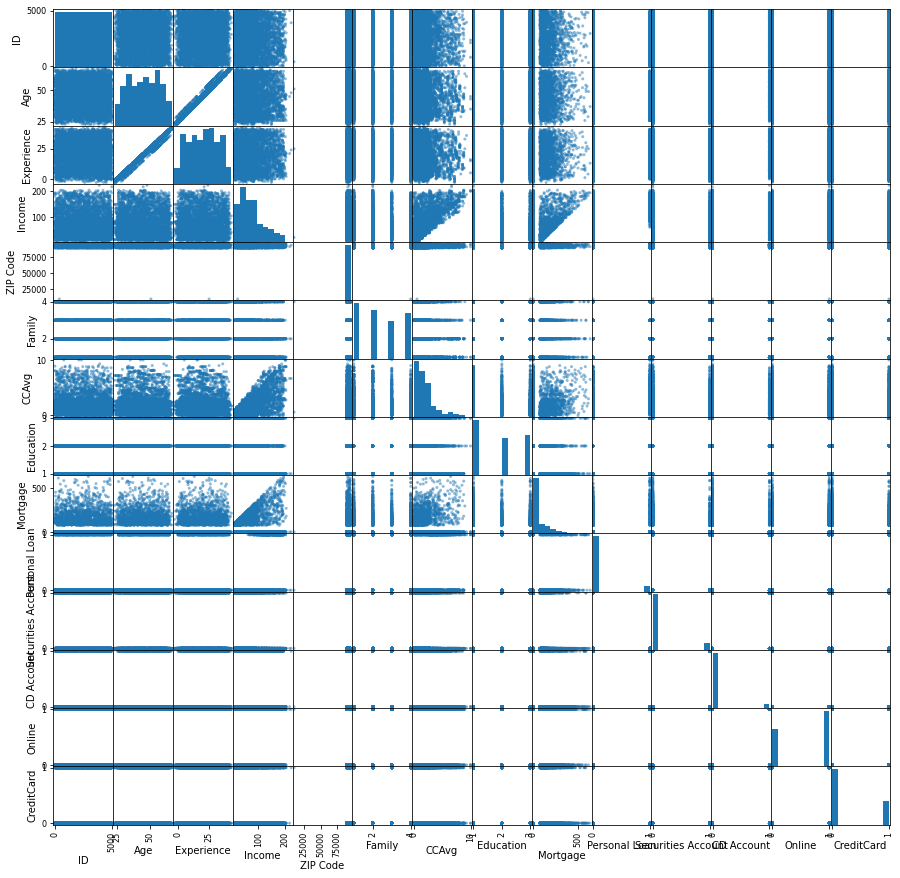

In [9]:
# Create a scatter matrix to visualize relationships between numerical variables
scatter_matrix(cleaned_dataset, figsize=(15, 15), diagonal='hist')
plt.show()


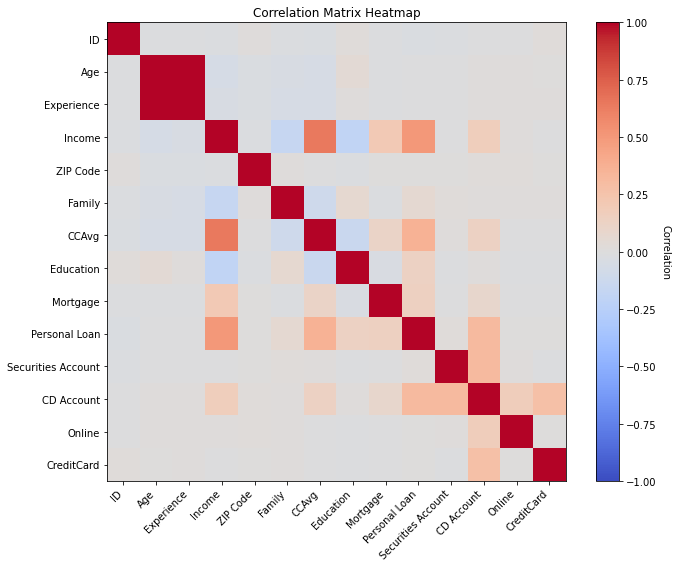

In [10]:
def show_correlation_matrix(dataset):
    # Calculate the correlation matrix
    correlation_matrix = dataset.corr()

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the correlation matrix as an image
    im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

    # Add a colorbar
    cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical')
    cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

    # Set labels, ticks, and title
    ax.set_xticks(range(len(correlation_matrix.columns)))
    ax.set_yticks(range(len(correlation_matrix.columns)))
    ax.set_xticklabels(correlation_matrix.columns)
    ax.set_yticklabels(correlation_matrix.columns)
    plt.xticks(rotation=45, ha="right")
    plt.title("Correlation Matrix Heatmap")

    # Display the heatmap
    plt.tight_layout()
    plt.show()

# Use the defined function to show the correlation matrix heatmap
show_correlation_matrix(cleaned_dataset)


In [11]:
# Load the dataset (assuming it's already loaded and cleaned)
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = pd.read_csv(csv_file_path)

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Print out the correlation coefficients in text format
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        correlation = correlation_matrix.loc[column1, column2]
        print(f"Correlation between {column1} and {column2}: {correlation:.3f}")


Correlation between ID and ID: 1.000
Correlation between ID and Age: -0.008
Correlation between ID and Experience: -0.008
Correlation between ID and Income: -0.018
Correlation between ID and ZIP Code: 0.013
Correlation between ID and Family: -0.017
Correlation between ID and CCAvg: -0.025
Correlation between ID and Education: 0.021
Correlation between ID and Mortgage: -0.014
Correlation between ID and Personal Loan: -0.025
Correlation between ID and Securities Account: -0.017
Correlation between ID and CD Account: -0.007
Correlation between ID and Online: -0.003
Correlation between ID and CreditCard: 0.017
Correlation between Age and ID: -0.008
Correlation between Age and Age: 1.000
Correlation between Age and Experience: 0.994
Correlation between Age and Income: -0.055
Correlation between Age and ZIP Code: -0.029
Correlation between Age and Family: -0.046
Correlation between Age and CCAvg: -0.052
Correlation between Age and Education: 0.041
Correlation between Age and Mortgage: -0.013

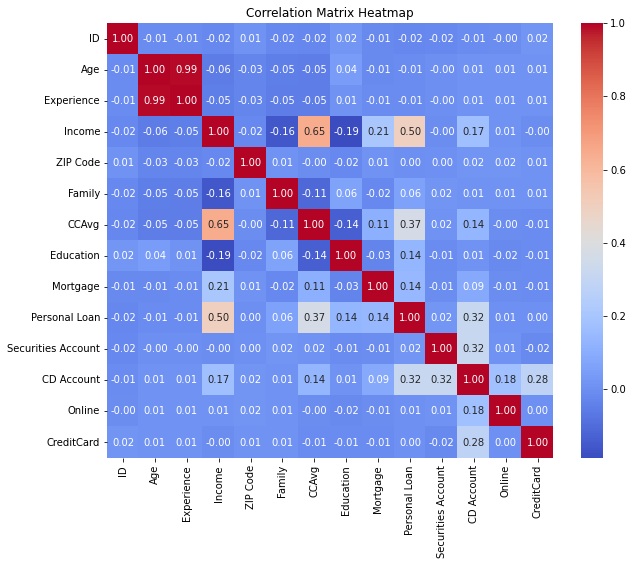

In [12]:
# Load the dataset (assuming it's already loaded and cleaned)
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = pd.read_csv(csv_file_path)

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.savefig("correlation_matrix_heatmap.png")  # Save the image
plt.show()


In [13]:
#Exploratory Data Analysis (EDA) for Personal Loan Modelling"

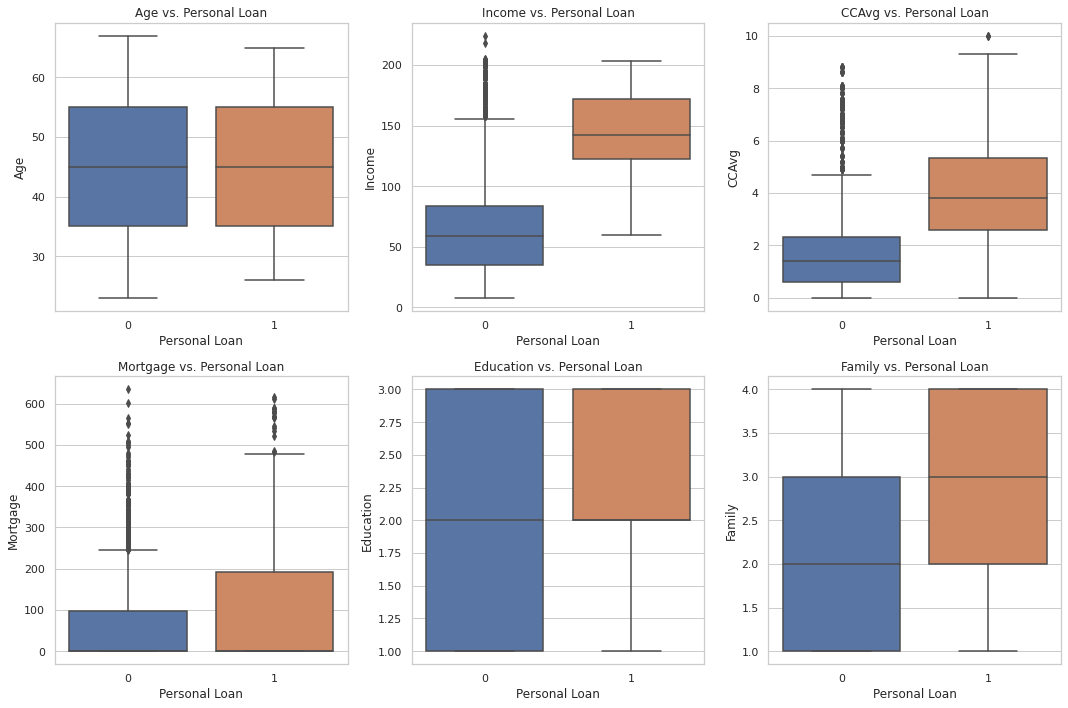

In [14]:
# Load the dataset using pd.read_csv
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = pd.read_csv(csv_file_path)

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for visualizations
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Box plot for Age
sns.boxplot(x="Personal Loan", y="Age", data=dataset, ax=axes[0, 0])
axes[0, 0].set_title("Age vs. Personal Loan")

# Box plot for Income
sns.boxplot(x="Personal Loan", y="Income", data=dataset, ax=axes[0, 1])
axes[0, 1].set_title("Income vs. Personal Loan")

# Box plot for CCAvg (Average Credit Card Spending)
sns.boxplot(x="Personal Loan", y="CCAvg", data=dataset, ax=axes[0, 2])
axes[0, 2].set_title("CCAvg vs. Personal Loan")

# Box plot for Mortgage
sns.boxplot(x="Personal Loan", y="Mortgage", data=dataset, ax=axes[1, 0])
axes[1, 0].set_title("Mortgage vs. Personal Loan")

# Box plot for Education
sns.boxplot(x="Personal Loan", y="Education", data=dataset, ax=axes[1, 1])
axes[1, 1].set_title("Education vs. Personal Loan")

# Box plot for Family Size
sns.boxplot(x="Personal Loan", y="Family", data=dataset, ax=axes[1, 2])
axes[1, 2].set_title("Family vs. Personal Loan")

# Adjust the layout of subplots
plt.tight_layout()

# Display the plots
plt.show()


In [15]:
#Density Plots for Personal Loan Acceptance

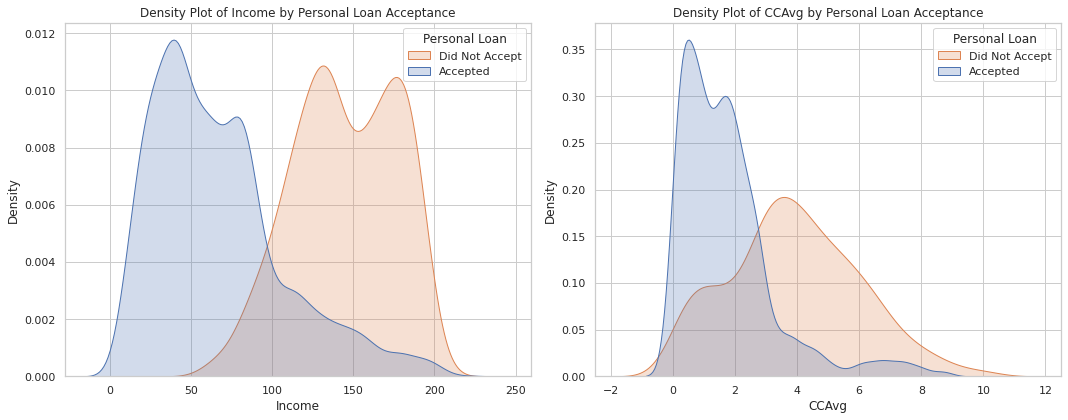

In [16]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create subplots for density plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Density plot for Income by Personal Loan
sns.kdeplot(data=dataset, x="Income", hue="Personal Loan", fill=True, common_norm=False, ax=axes[0])
axes[0].set_title("Density Plot of Income by Personal Loan Acceptance")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Density")
axes[0].legend(title="Personal Loan", labels=["Did Not Accept", "Accepted"])

# Density plot for CCAvg by Personal Loan
sns.kdeplot(data=dataset, x="CCAvg", hue="Personal Loan", fill=True, common_norm=False, ax=axes[1])
axes[1].set_title("Density Plot of CCAvg by Personal Loan Acceptance")
axes[1].set_xlabel("CCAvg")
axes[1].set_ylabel("Density")
axes[1].legend(title="Personal Loan", labels=["Did Not Accept", "Accepted"])

# Adjust the layout of subplots
plt.tight_layout()

# Display the plots
plt.show()


In [17]:
# Value Counts for Personal Loan

In [18]:
# Load the dataset
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = pd.read_csv(csv_file_path)

# Get value counts for the "Personal Loan" column
loan_counts = dataset["Personal Loan"].value_counts()

# Translate values for better understanding
loan_counts_df = pd.DataFrame({
    "Personal Loan": ["Did Not Accept (0)", "Accepted (1)"],
    "Count": loan_counts
})

print(loan_counts_df)


        Personal Loan  Count
0  Did Not Accept (0)   4520
1        Accepted (1)    480


In [19]:
# Data Transformation

In [20]:
categorical_columns = ["Education", "Family", "Securities Account", "CD Account", "Online", "CreditCard"]

for column in categorical_columns:
    dataset[column] = dataset[column].astype("category")
    print(f"Converted column '{column}' to category label.")


Converted column 'Education' to category label.
Converted column 'Family' to category label.
Converted column 'Securities Account' to category label.
Converted column 'CD Account' to category label.
Converted column 'Online' to category label.
Converted column 'CreditCard' to category label.


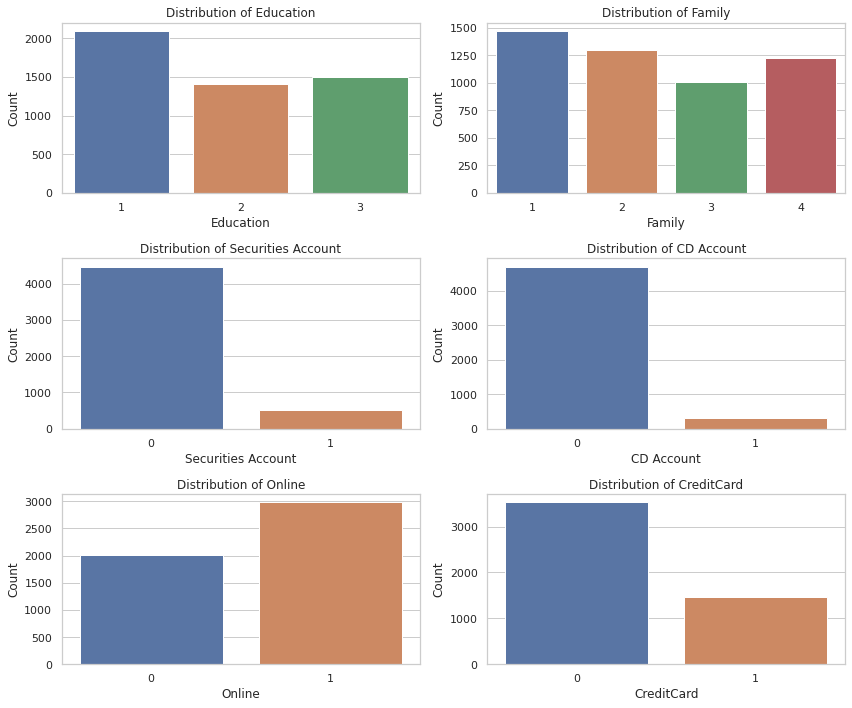

In [21]:
# Plot bar charts for categorical columns
plt.figure(figsize=(12, 10))

# Loop through categorical columns and create bar charts
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=dataset, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [22]:
# Feature Engineering

In [23]:
#  convert 'Education' to categorical labels
education_mapping = {1: 'Undergraduate', 2: 'Graduate', 3: 'Advanced/Professional'}
dataset['Education'] = dataset['Education'].map(education_mapping)

# Feature Engineering
# Create a new feature 'Income_per_Age'
dataset['Income_per_Age'] = dataset['Income'] / dataset['Age']

# Display the first few rows of the modified dataset
print("\nModified Dataset:")
print(dataset.head())



Modified Dataset:
   ID  Age  Experience  Income  ZIP Code Family  CCAvg      Education  \
0   1   25           1      49     91107      4    1.6  Undergraduate   
1   2   45          19      34     90089      3    1.5  Undergraduate   
2   3   39          15      11     94720      1    1.0  Undergraduate   
3   4   35           9     100     94112      1    2.7       Graduate   
4   5   35           8      45     91330      4    1.0       Graduate   

   Mortgage  Personal Loan Securities Account CD Account Online CreditCard  \
0         0              0                  1          0      0          0   
1         0              0                  1          0      0          0   
2         0              0                  0          0      0          0   
3         0              0                  0          0      0          0   
4         0              0                  0          0      0          1   

   Income_per_Age  
0        1.960000  
1        0.755556  
2        0.28

In [24]:
# Plots showing conversion and distribution to categorical labels

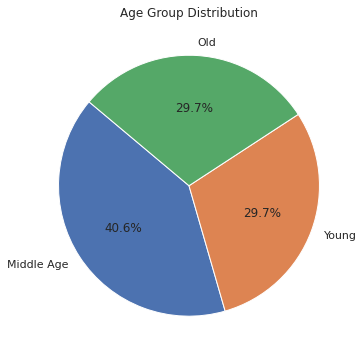

In [25]:
# Define a function to categorize age into groups
def age_group(x):
    if x < 38:
        return "Young"
    elif x < 54:
        return "Middle Age"
    else:
        return "Old"

# Apply the age_group function to create a new column 'Age_group'
dataset["Age_group"] = dataset["Age"].apply(lambda x: age_group(x))

# Convert the 'Age_group' column to a categorical variable
dataset["Age_group"] = dataset["Age_group"].astype("category")

# Calculate the percentage distribution of age groups
age_group_counts = dataset["Age_group"].value_counts()
age_group_percentages = (age_group_counts / age_group_counts.sum()) * 100

# Plot a pie chart for age group distribution
plt.figure(figsize=(6, 6))
plt.pie(age_group_percentages, labels=age_group_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.show()


In [26]:
# Personal Loan Acceptance by Age Group

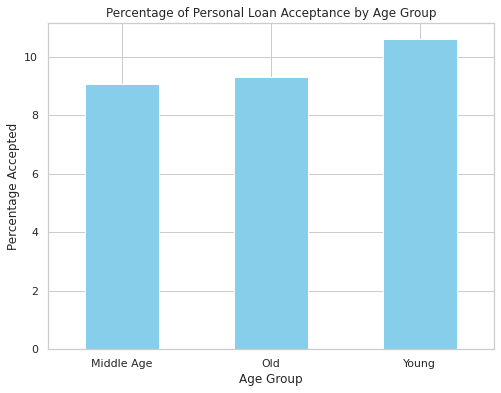

In [27]:
# Group the data by age group and calculate the percentage of personal loan acceptance in each group
age_group_loan_acceptance = dataset.groupby("Age_group")["Personal Loan"].mean() * 100

# Plot the results
plt.figure(figsize=(8, 6))
age_group_loan_acceptance.plot(kind="bar", color="skyblue")
plt.title("Percentage of Personal Loan Acceptance by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage Accepted")
plt.xticks(rotation=0)
plt.show()


In [28]:
# "Exploring Feature Relationships in Personal Loan Acceptance"

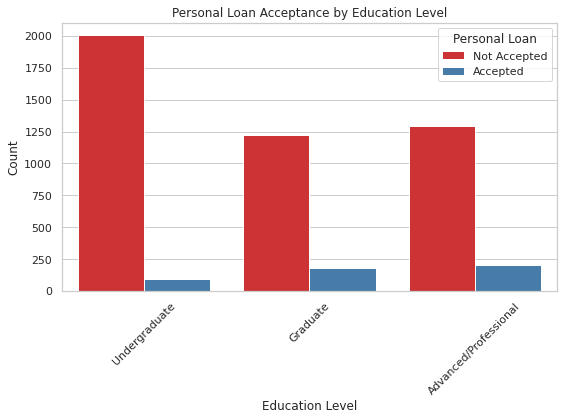

In [29]:
# Load the dataset
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = pd.read_csv(csv_file_path)

# Data Transformation
# Map 'Education' to categorical labels
education_mapping = {1: 'Undergraduate', 2: 'Graduate', 3: 'Advanced/Professional'}
dataset['Education'] = dataset['Education'].map(education_mapping)

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Education', hue='Personal Loan', palette='Set1')
plt.title("Personal Loan Acceptance by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Personal Loan", labels=["Not Accepted", "Accepted"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
## Machine Learning

In [31]:
# Load the dataset
csv_file_path = "Visa_For_Lisa_Loan_Modelling.csv"
dataset = pd.read_csv(csv_file_path)

# Define your features (X) and target variable (y)
X = dataset[['Income', 'Family', 'Experience']]  # Modify features as needed
y = dataset['Personal Loan']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the dimensions of the training and testing sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 3)
X_test shape: (1000, 3)
y_train shape: (4000,)
y_test shape: (1000,)


In [32]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multilayer Perceptron": MLPClassifier()
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model and store the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Print the accuracy results for each model
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")


Logistic Regression: Accuracy = 0.93
Decision Tree: Accuracy = 0.94
Random Forest: Accuracy = 0.94
SVM: Accuracy = 0.90
K-Nearest Neighbors: Accuracy = 0.92
Multilayer Perceptron: Accuracy = 0.94


# Random Forest is the best model looking at the result

In [33]:
# Model Evaluation: Assessing Performance Metrics

In [34]:
# "Random Forest" model trained and its predictions
y_pred = model.predict(X_test)  # Replace "model" with the variable name you assigned to your model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.94
Precision: 1.00
Recall: 0.45
F1-Score: 0.62


#Random Forest: It's chosen because it's a robust and accurate model that handles complex data well.

#Recall Optimization: Prioritizing recall helps capture potential loan customers, increase conversion rates, and aligns with Galaxy bank's strategic marketing goals. It balances effectively identifying true positives while being mindful of false positives.

In [35]:
# Optimizing Model Threshold for Improved Loan Customer Targeting

In [36]:
# trained Random Forest model, 'model', and X_test and y_test data
y_proba = model.predict_proba(X_test)[:, 1]

# Adjusting the threshold to prioritize recall
threshold = 0.4  # You can experiment with different threshold values
y_pred = [1 if p >= threshold else 0 for p in y_proba]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Threshold: {threshold:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Threshold: 0.40
Accuracy: 0.95
Precision: 0.97
Recall: 0.55
F1-Score: 0.70


In [37]:
# "Fine-Tuning the Random Forest Model for Recall Optimization in Accordance with Project Objectives"

In [38]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Create a grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model)
best_model = grid_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_model)



Best Hyperparameters: {'max_depth': 10, 'n_estimators': 300}
Best Estimator: RandomForestClassifier(max_depth=10, n_estimators=300)


In [39]:
# Final Model Evaluation 

In [40]:
#  Random Forest model with the best hyperparameters
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])

# Perform cross-validation to assess model performance, focusing on recall
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='recall')

# Print the cross-validation scores
print("Cross-Validation Scores (Recall):", cv_scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Recall: {mean_score:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")


Cross-Validation Scores (Recall): [0.50666667 0.57333333 0.56       0.54666667 0.53333333]
Mean Recall: 0.54
Standard Deviation: 0.02
